#TAREA 3 DATA MINING
- Estudiante: Jorge Luis David Mesa 
- cc: 1007322018

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 

contents = "https://raw.githubusercontent.com/mhemmg/datasets/master/car_emission/cars_CO2_emissions_D.csv"
contents_2 = "https://raw.githubusercontent.com/mhemmg/datasets/master/car_emission/car_brands_countries.csv"

#**1. Carga y limpieza de los datos**

a) Complete el conjunto de datos de la emisión de CO2 del automóvil con los datos sobre el origen de las marcas.

In [2]:
df1 = pd.read_csv(contents)
df2 = pd.read_csv(contents_2)
df3 = pd.merge(df1,df2)
df3

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Country,Continent
0,ACURA,ILX,COMPACT,2.0,4.0,AS5,premium gasoline,9.9,6.7,8.5,33.0,196.0,USA,America
1,ACURA,ILX,COMPACT,2.4,4.0,M6,premium gasoline,11.2,7.7,9.6,29.0,221.0,USA,America
2,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,premium gasoline,6.0,5.8,5.9,48.0,136.0,USA,America
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,premium gasoline,12.7,9.1,11.1,25.0,255.0,USA,America
4,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,premium gasoline,12.1,8.7,10.6,27.0,244.0,USA,America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6272,GENESIS,G70 AWD,COMPACT,3.3,6.0,AS8,premium gasoline,14.1,9.5,12.0,24.0,284.0,USA,America
6273,GENESIS,G90 AWD,FULL-SIZE,3.3,6.0,AS8,premium gasoline,13.6,9.5,11.8,24.0,280.0,USA,America
6274,GENESIS,G90 AWD,FULL-SIZE,5.0,8.0,AS8,premium gasoline,15.4,10.2,13.1,22.0,311.0,USA,America
6275,BUGATTI,CHIRON,TWO-SEATER,8.0,16.0,AM7,premium gasoline,26.8,16.6,22.2,13.0,522.0,Italy,Europe


b) Del conjunto de datos dado imprima las primeras y las últimas diez filas.

In [3]:
df3[:10]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Country,Continent
0,ACURA,ILX,COMPACT,2.0,4.0,AS5,premium gasoline,9.9,6.7,8.5,33.0,196.0,USA,America
1,ACURA,ILX,COMPACT,2.4,4.0,M6,premium gasoline,11.2,7.7,9.6,29.0,221.0,USA,America
2,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,premium gasoline,6.0,5.8,5.9,48.0,136.0,USA,America
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,premium gasoline,12.7,9.1,11.1,25.0,255.0,USA,America
4,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,premium gasoline,12.1,8.7,10.6,27.0,244.0,USA,America
5,ACURA,RLX,MID-SIZE,3.5,6.0,AS6,premium gasoline,11.9,7.7,10.0,28.0,230.0,USA,America
6,ACURA,TL,MID-SIZE,3.5,6.0,AS6,premium gasoline,11.8,8.1,10.1,28.0,232.0,USA,America
7,ACURA,TL AWD,MID-SIZE,3.7,6.0,AS6,premium gasoline,12.8,9.0,11.1,25.0,255.0,USA,America
8,ACURA,TL AWD,MID-SIZE,3.7,6.0,M6,premium gasoline,13.4,9.5,11.6,24.0,267.0,USA,America
9,ACURA,TSX,COMPACT,2.4,4.0,AS5,premium gasoline,10.6,7.5,9.2,31.0,212.0,USA,America


In [4]:
df3[-10:]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Country,Continent
6267,GENESIS,G80 AWD,FULL-SIZE,5.0,8.0,AS8,premium gasoline,15.6,10.4,13.2,21.0,312.0,USA,America
6268,GENESIS,G70,COMPACT,2.0,4.0,M6,premium gasoline,12.8,8.5,10.9,26.0,255.0,USA,America
6269,GENESIS,G70 AWD,COMPACT,2.0,4.0,AS8,premium gasoline,11.5,8.7,10.3,27.0,241.0,USA,America
6270,GENESIS,G70 AWD,COMPACT,3.3,6.0,AS8,premium gasoline,13.3,9.5,11.6,24.0,274.0,USA,America
6271,GENESIS,G70 AWD,COMPACT,2.0,4.0,AS8,premium gasoline,11.4,8.6,10.2,28.0,238.0,USA,America
6272,GENESIS,G70 AWD,COMPACT,3.3,6.0,AS8,premium gasoline,14.1,9.5,12.0,24.0,284.0,USA,America
6273,GENESIS,G90 AWD,FULL-SIZE,3.3,6.0,AS8,premium gasoline,13.6,9.5,11.8,24.0,280.0,USA,America
6274,GENESIS,G90 AWD,FULL-SIZE,5.0,8.0,AS8,premium gasoline,15.4,10.2,13.1,22.0,311.0,USA,America
6275,BUGATTI,CHIRON,TWO-SEATER,8.0,16.0,AM7,premium gasoline,26.8,16.6,22.2,13.0,522.0,Italy,Europe
6276,BUGATTI,Chiron,TWO-SEATER,8.0,16.0,AM7,premium gasoline,26.8,16.6,22.2,13.0,522.0,Italy,Europe


c) Muestre todos los nombres de las columnas del conjunto de datos.

In [5]:
columns_names = df3.columns.values
columns_names_list = list(columns_names)
columns_names_list

['Make',
 'Model',
 'Vehicle Class',
 'Engine Size(L)',
 'Cylinders',
 'Transmission',
 'Fuel Type',
 'Fuel Consumption City (L/100 km)',
 'Fuel Consumption Hwy (L/100 km)',
 'Fuel Consumption Comb (L/100 km)',
 'Fuel Consumption Comb (mpg)',
 'CO2 Emissions(g/km)',
 'Country',
 'Continent']

d) Cuente el número de columnas y el número de filas.

In [6]:
print('total filas =',df3.shape[0])

total filas = 6277


In [7]:
print('total columnas =',df3.shape[1])

total columnas = 14


e) Reemplace todos los valores de columna que contengan "?" o valores vacíos con valores NaN.

In [8]:
df3 = df3.replace(to_replace={'?':' NaN ','':' NaN '})


f) Cuente las entradas de valores NaN y elimine las filas con NaN.

In [9]:
N = np.zeros(len(columns_names))

for i in range(len(columns_names)):
  N[i]=df3.loc[df3[columns_names[i]].astype(str).str.contains(" NaN ", case=False)].shape[0]

print('Entradas totales NaN :',sum(N))  

Entradas totales NaN : 3.0


In [10]:
row_numbers = []
for i in range(len(columns_names)):
  x=df3.loc[df3[columns_names[i]].astype(str).str.contains(" NaN ", case=False)].index.values
  if len(x)> 0:
    row_numbers.append(x)

In [11]:
for i in range(len(row_numbers)):
  df3=df3.drop(row_numbers[i],axis=0)

df3

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Country,Continent
0,ACURA,ILX,COMPACT,2.0,4.0,AS5,premium gasoline,9.9,6.7,8.5,33.0,196.0,USA,America
1,ACURA,ILX,COMPACT,2.4,4.0,M6,premium gasoline,11.2,7.7,9.6,29.0,221.0,USA,America
2,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,premium gasoline,6.0,5.8,5.9,48.0,136.0,USA,America
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,premium gasoline,12.7,9.1,11.1,25.0,255.0,USA,America
4,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,premium gasoline,12.1,8.7,10.6,27.0,244.0,USA,America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6272,GENESIS,G70 AWD,COMPACT,3.3,6.0,AS8,premium gasoline,14.1,9.5,12.0,24.0,284.0,USA,America
6273,GENESIS,G90 AWD,FULL-SIZE,3.3,6.0,AS8,premium gasoline,13.6,9.5,11.8,24.0,280.0,USA,America
6274,GENESIS,G90 AWD,FULL-SIZE,5.0,8.0,AS8,premium gasoline,15.4,10.2,13.1,22.0,311.0,USA,America
6275,BUGATTI,CHIRON,TWO-SEATER,8.0,16.0,AM7,premium gasoline,26.8,16.6,22.2,13.0,522.0,Italy,Europe


g) Cuente las filas repetidas y elimínela

In [12]:
duplicated = df3[df3.duplicated()]
print('Filas repetidas:',duplicated.shape[0])

Filas repetidas: 0


#**2. Adición y cambio de las características**

a) Cambie los nombres de la gasolina ('Fuel Type') a nombres más significativos (X = gasolina regular, Z = gasolina premium, D = diesel, E = etanol (E85), N = gas natural).



In [13]:
df3 = df3.replace(to_replace={'regular gasoline':'X','premium gasoline':'Z','diesel':'D','ethanol':'E', 'natural gas':'N'})


b) Cree una nueva columna llamada 'Automatic / Manual' donde solo aparecerán valores de cadenas: A y M (extraiga dichos valores de la columna 'Transmission').

In [14]:
T = np.array(df3['Transmission'])
for i in range(len(T)):
  if T[i][0] == 'A':
     T[i]='A'

  elif T[i][0] == 'M':
    T[i]='M'    


In [15]:
df3['Automatic/Manual'] = T

c) Cree una nueva columna llamada ' A / M digital' donde solo aparecerán valores numéricos: 1 / 0. Los valores enteros 1 y 0 serán valores correspondientes al carro con transmision automática o manual (tener una columna con el valor digital de la transmisión puede ser útil al realizar la regresión, porque la regresión usando scikit-learn funciona solo con valores numéricos).

In [16]:
for i in range(len(T)):
  if T[i] == 'A':
     T[i]=1

  elif T[i] == 'M':
    T[i]=0

In [17]:
df3['A/M digital'] = T


#**3. Extracción de información**

a) Cuente cuántas marcas de automóviles ("Make") están en el conjunto de datos.

In [18]:
freq = df3['Make'].nunique()
freq

42

b) Cuente el total de carros por marca y muestre las primeras diez marcas más comunes.



In [19]:
M= df3.groupby('Make')['Make'].count()
M.nlargest(10)

Make
FORD             577
CHEVROLET        515
BMW              499
MERCEDES-BENZ    364
PORSCHE          296
GMC              289
TOYOTA           276
AUDI             262
NISSAN           213
JEEP             200
Name: Make, dtype: int64

c) Cuente el total de carros por marca y muestre las primeras diez marcas menos comunes.

In [20]:
M.nsmallest(10)

Make
BUGATTI          2
SRT              2
SMART            8
GENESIS         14
ALFA ROMEO      19
SCION           21
BENTLEY         35
LAMBORGHINI     37
ASTON MARTIN    39
ROLLS-ROYCE     48
Name: Make, dtype: int64

d) Muestre la fila entera para un coche con la menor emisión de CO2.

In [21]:
df3.nsmallest(1,columns='CO2 Emissions(g/km)')

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Country,Continent,Automatic/Manual,A/M digital
3078,HYUNDAI,IONIQ BLUE,FULL-SIZE,1.6,4.0,AM6,X,4.2,4.0,4.1,69.0,96.0,Korea,Asia,A,1


e) Muestre la fila entera para un coche con la mayor emisión de CO2

In [22]:
df3.nlargest(1,columns='CO2 Emissions(g/km)')

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Country,Continent,Automatic/Manual,A/M digital
6275,BUGATTI,CHIRON,TWO-SEATER,8.0,16.0,AM7,Z,26.8,16.6,22.2,13.0,522.0,Italy,Europe,A,1


f) Encuentre la emisión media de C02 por marca.

In [23]:
E = df3.groupby('Make')['CO2 Emissions(g/km)']
E.mean()

Make
ACURA            221.260000
ALFA ROMEO       231.315789
ASTON MARTIN     344.282051
AUDI             252.522901
BENTLEY          367.914286
BMW              252.601202
BUGATTI          522.000000
BUICK            233.750000
CADILLAC         266.366906
CHEVROLET        264.477670
CHRYSLER         244.046875
DODGE            277.088889
FIAT             192.285714
FORD             261.285962
GENESIS          282.571429
GMC              300.529412
HONDA            191.262195
HYUNDAI          208.316940
INFINITI         254.011494
JAGUAR           272.743590
JEEP             250.795000
KIA              213.796875
LAMBORGHINI      402.270270
LAND ROVER       288.078947
LEXUS            242.124031
LINCOLN          265.814815
MASERATI         318.134615
MAZDA            192.755906
MERCEDES-BENZ    278.623626
MINI             196.570000
MITSUBISHI       200.095890
NISSAN           237.375587
PORSCHE          259.192568
RAM              294.180556
ROLLS-ROYCE      388.750000
SCION          

g) Encuentre la emisión media de C02 por continente.

In [24]:
EC = df3.groupby('Continent')['CO2 Emissions(g/km)']
EC.mean()

Continent
America    266.135902
Asia       216.030728
Europe     258.243478
Name: CO2 Emissions(g/km), dtype: float64

#**4. Trazado**

a) Realice un 'boxplot' (diagrama de caja) comparando la emisión de los carros por continentes: América, Europa, Asia (añadir línea media para comparación).

In [25]:
EC_m=np.array(EC)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


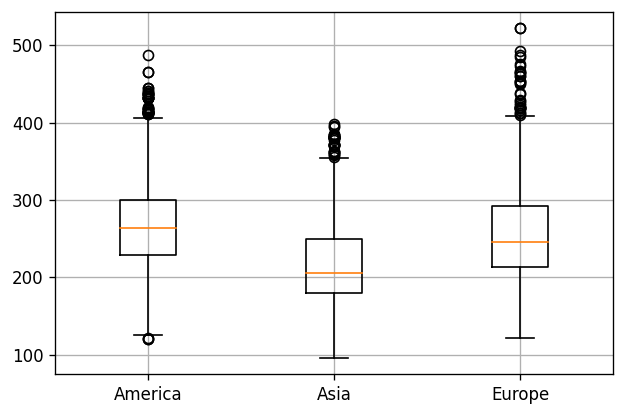

In [26]:
plt.figure(dpi=120)
plt.boxplot((EC_m[0][1],EC_m[1][1],EC_m[2][1]))
plt.xticks([1, 2, 3], [EC_m[0][0],EC_m[1][0],EC_m[2][0]])
plt.grid()

b) Realice un 'boxplot' (diagrama de caja) comparando la emisión de los carros por transmisión (dos grupos: manual y automática. Añadir línea media para comparación).

In [27]:
AM = df3.groupby('Automatic/Manual')['CO2 Emissions(g/km)']
AM_ = np.array(AM)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


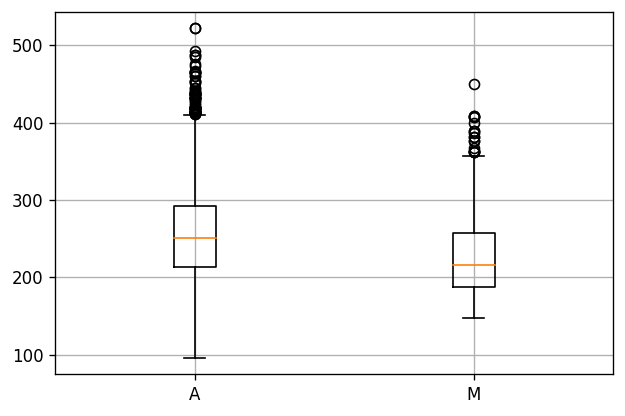

In [28]:
plt.figure(dpi=120)
plt.boxplot((AM_[0][1],AM_[1][1]))
plt.xticks([1, 2], [AM_[0][0],AM_[1][0]])
plt.grid()

c) Realice un 'boxplot' (diagrama de caja) comparando la emisión de los carros por tipo de combustible (añadir línea media para comparación).

In [29]:
Co = df3.groupby('Fuel Type')['CO2 Emissions(g/km)']
Co_ = np.array(Co)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


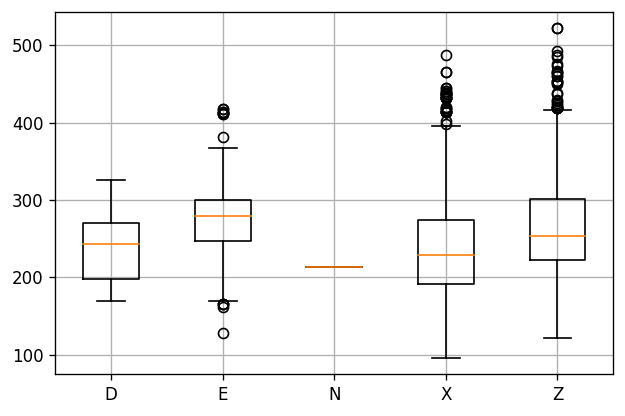

In [30]:
plt.figure(dpi=120)
plt.boxplot((Co_[0][1],Co_[1][1],Co_[2][1],Co_[3][1],Co_[4][1]))
plt.xticks([1, 2, 3, 4, 5], [Co_[0][0],Co_[1][0],Co_[2][0],Co_[3][0],Co_[4][0]])
plt.grid()

d) Realice un 'countplot' de conteo de automóviles con transmisión manual y automática (solo dos grupos).

In [31]:
import seaborn as sns

[Text(0, 0, 'A'), Text(0, 0, 'M')]

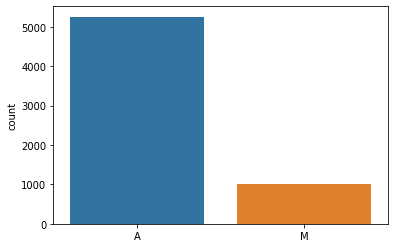

In [32]:
fig = sns.countplot(data= (AM_[0][1],AM_[1][1]))
fig.set_xticklabels(['A','M'])


e) Realice un 'barplot' de una emisión promedio de CO2 por marca de automóvil (de menor a mayor).

In [33]:
E_m = E.mean()
E_m=E_m.nsmallest(len(E_m))

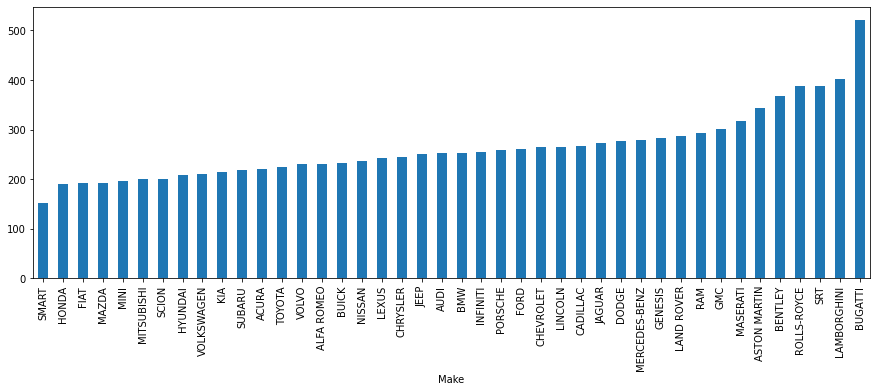

In [34]:
E_m.plot.bar(figsize=(15,5))

f) Ordene el conjunto de datos por marca y emisión de CO2 y guárdelo en el archivo CSV (preferiblemente sin guardar el número de índice).

In [35]:
E_m.to_csv('Make_CO2_Emission.csv', index=False)


#**Ejercicio II: utilice este gran conjunto de datos históricos sobre los Juegos Olímpicos modernos, incluidos todos los Juegos desde Atenas 1896 hasta Río 2016.**


In [36]:
contents_3 = 'https://raw.githubusercontent.com/mhemmg/datasets/master/sport/athlete_events.csv'

#**1. Mirando un deporte particular: remo - rowing, ver si la edad de las medallistas de oro femeninas está aumentando o disminuyendo a través de los tiempos. Realize un plot para muestrar la tendencia (si hay una)**

In [37]:
dfj = pd.read_csv(contents_3)
dfj

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


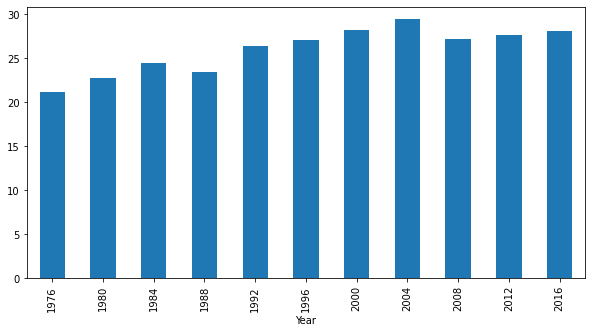

In [38]:
F_r = dfj[dfj.Sex.isin(['F']) & dfj.Medal.isin(['Gold']) & dfj.Sport.isin(['Rowing'])].groupby('Year')['Age']
F_r.mean().plot.bar(figsize=(10,5))


Se puede observar que no hay una tendencia marcada pero se evidencia un pico en el 2004 y como punto mas bajo en 1976

#**2. Sea creativo y extrae algunas informaciones interesantes de este conjunto.**

In [39]:
A=dfj.groupby('Sex')['Age'].mean()
A

Sex
F    23.732881
M    26.277562
Name: Age, dtype: float64

Promedio de Edad por sexos es mayor en los hombres

In [40]:
W=dfj.groupby('Sex')['Weight'].mean()
W

Sex
F    60.021252
M    75.743677
Name: Weight, dtype: float64

Promedio de peso por sexos es mayor en los hombres

In [41]:
Ch = dfj[dfj.Medal.isin(['Gold'])]
freq = Ch.groupby(['Team', 'Medal']).size() 
freq.sort_values()[-10:]


Team           Medal
East Germany   Gold      369
Canada         Gold      422
Hungary        Gold      432
Sweden         Gold      451
France         Gold      455
Great Britain  Gold      519
Italy          Gold      535
Germany        Gold      679
Soviet Union   Gold     1058
United States  Gold     2474
dtype: int64

El pais con mas medallas de oro es United States con mas del doble de medallas que el segundo que es Soviet Union